In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


# EDA

## Import the data

In [2]:
df = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')

df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
test_df = pd.read_csv('/kaggle/input/mobile-price-classification/test.csv')

test_df

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


There is no price ranges for the test data (was probably a competition), therefore gonna have to split the train set up to test the models

Going to start by looking at the summary stats of the variables

## Inspect the code

In [4]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.495000,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.500100,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Clean the data

### Missing values

In [5]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

No NA values so no ned to worry there

In [6]:
from sklearn.model_selection import train_test_split

y = df['price_range']
X = df.drop('price_range', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [7]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
819,1236,0,0.9,1,2,1,57,0.1,188,1,14,517,809,1406,14,12,20,1,0,1
358,1394,1,0.9,1,10,1,62,0.3,175,5,13,1010,1565,473,11,1,20,1,1,0
683,1713,0,2.5,1,1,0,27,0.9,127,7,3,729,974,2406,13,10,20,1,0,1
1039,504,1,0.5,1,2,1,46,0.9,172,5,14,280,1795,2085,13,5,8,1,0,0
1151,696,1,2.4,0,11,1,35,0.2,103,3,13,533,797,2022,14,11,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527,1837,0,1.0,1,5,1,12,0.9,103,8,6,1420,1539,2294,8,7,20,1,0,1
1535,600,1,1.8,0,9,1,6,0.8,199,2,15,486,1032,3495,17,4,7,1,1,0
202,1087,0,1.3,0,0,1,16,0.3,166,3,9,295,589,690,14,6,6,1,0,1
1322,808,0,1.9,0,7,0,20,0.8,185,6,14,496,974,1471,13,4,11,0,1,0


## Distributions of variables

In [8]:
"""import matplotlib.pyplot as plt
import seaborn as sns

quarter = len(df.columns) // 4 # A quarter of the amount of rows to determine the positions and number of columns

fig, axes = plt.subplots(nrows=4, ncols=quarter, figsize=(24, 30))

for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[i // quarter, i % quarter])
    axes[i // quarter, i % quarter].set_title(f'Distribution of {col}')"""

"import matplotlib.pyplot as plt\nimport seaborn as sns\n\nquarter = len(df.columns) // 4 # A quarter of the amount of rows to determine the positions and number of columns\n\nfig, axes = plt.subplots(nrows=4, ncols=quarter, figsize=(24, 30))\n\nfor i, col in enumerate(df.columns):\n    sns.histplot(df[col], kde=True, ax=axes[i // quarter, i % quarter])\n    axes[i // quarter, i % quarter].set_title(f'Distribution of {col}')"

Notable categorical variables look like: blue, dual_sim, fc, three_g, touch_screen, wifi,four_g. I will look at the distributions of these now

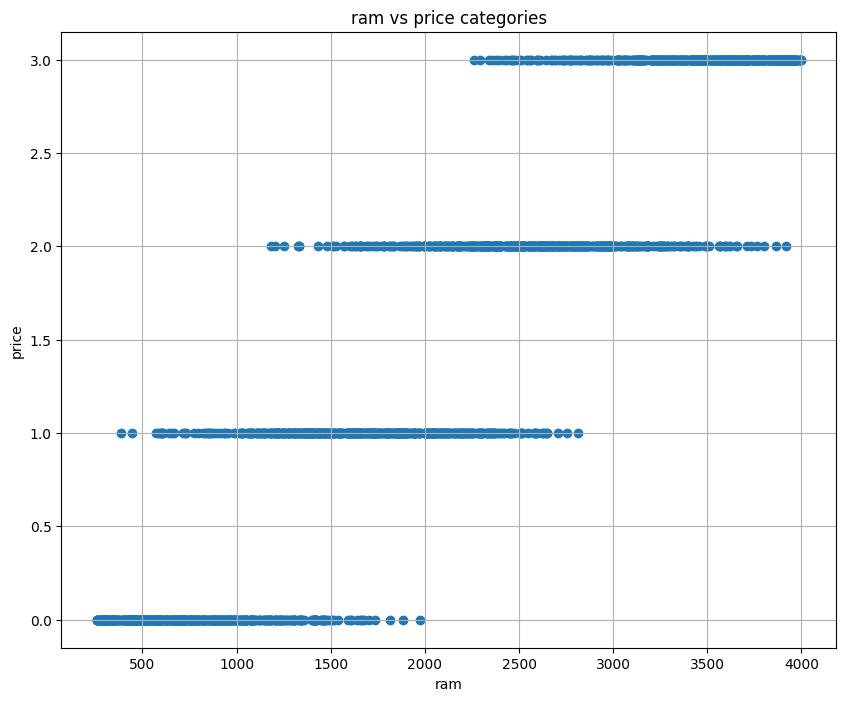

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
plt.scatter(df['ram'] , df['price_range'])
plt.title('ram vs price categories')
plt.xlabel('ram')
plt.ylabel('price')
plt.grid()
plt.show()


### Target variable analysis

#### Countplot

<Axes: xlabel='price_range', ylabel='count'>

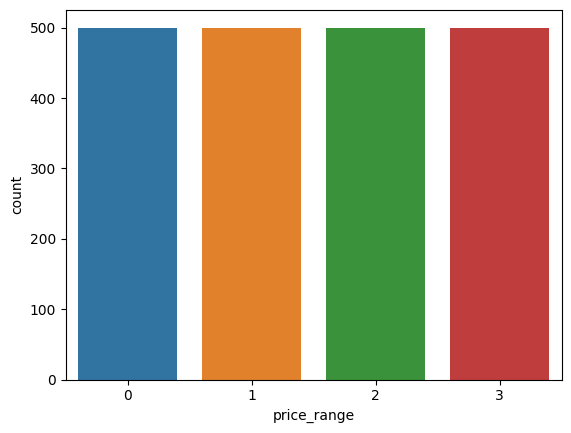

In [10]:
sns.countplot(x=y)

So the count is identical across all price ranges, so no need for SMOTE oversampling

#### Correlation analysis

First I will look at the correlation of all of the variables together, and then look at the target variable (price range) in isolation

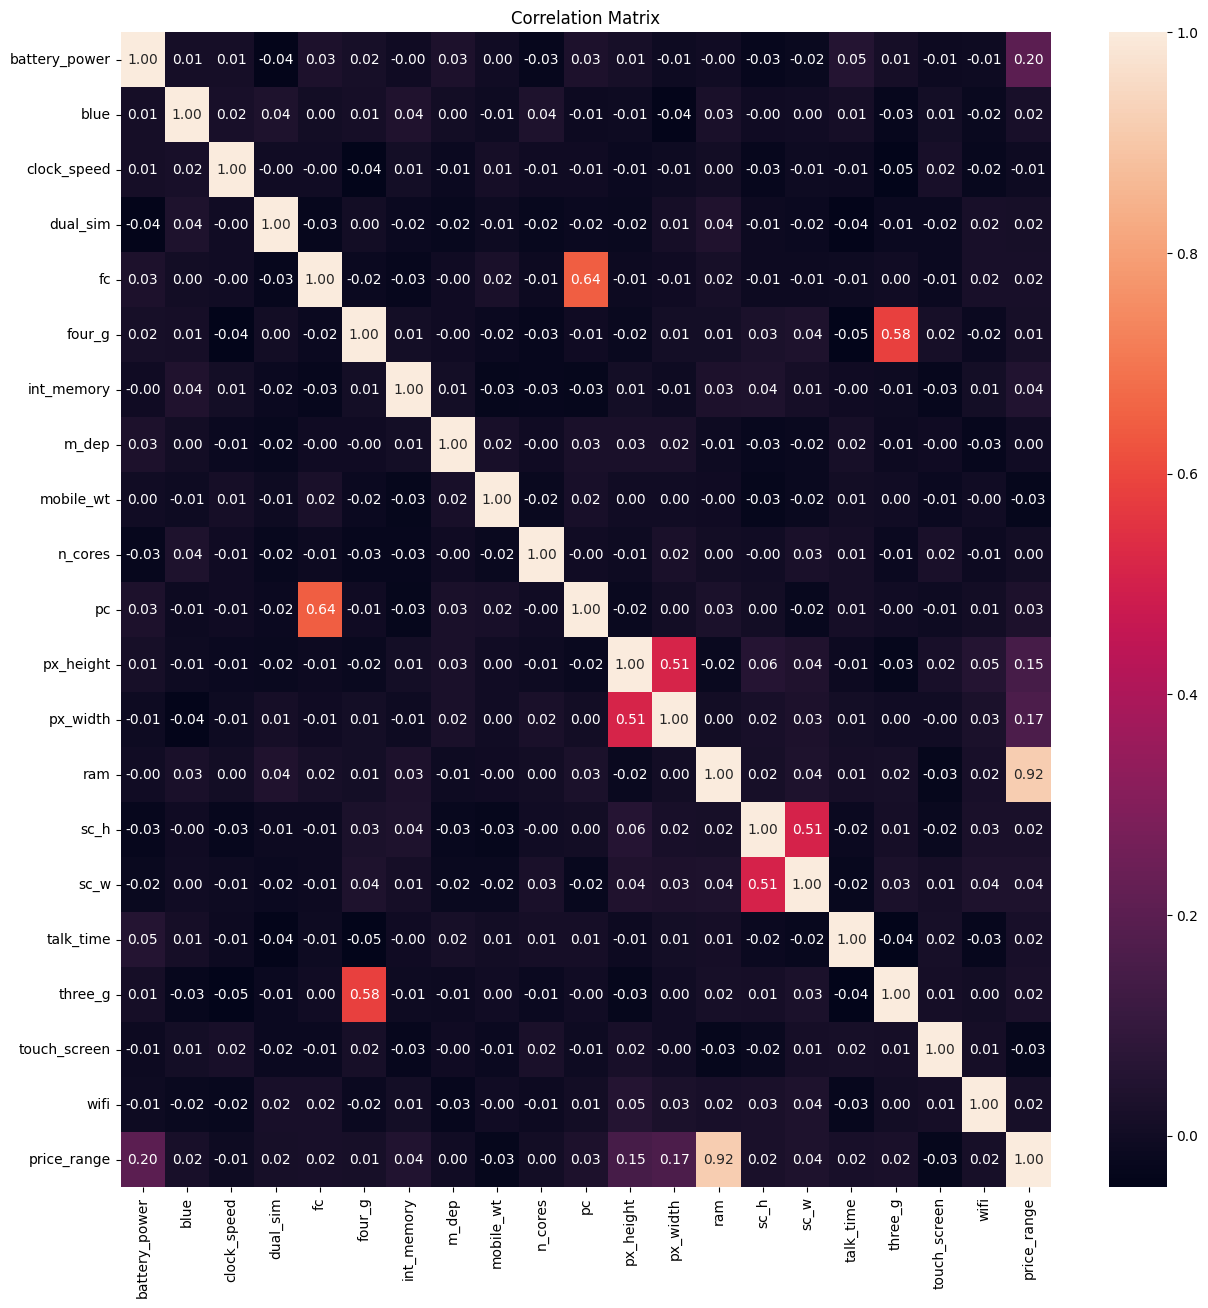

In [11]:
plt.figure(figsize=(15, 15))

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

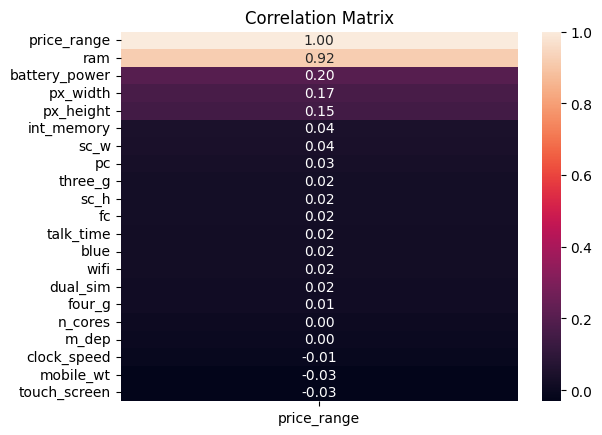

In [12]:
price_corr = correlation_matrix[['price_range']]

sns.heatmap(price_corr.sort_values(by="price_range", ascending=False), annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

So the pixel resolution, battery and ram seem to be the things most significantly correlated with the price range, good to keep in mind...

# Model building

## Preprocessing

### Split the data

In [13]:
from sklearn.model_selection import train_test_split

y = df['price_range']
X = df.drop('price_range', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

### Normalise the data

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Logistic Regression

### Model training

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)

predictions

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([3, 0, 2, 1, 3, 0, 0, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 1, 2, 3, 1, 3, 1, 1, 0, 1, 0, 2, 3, 0, 0, 3, 3, 3, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 3, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 2, 1, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 2, 0, 0, 3, 3, 3, 0, 3, 1, 1, 2, 1, 3, 2, 3, 3, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 2, 2, 3, 3, 0,
       2, 2, 3, 1, 2, 1, 0, 1, 2, 2, 2, 0, 2, 3, 1, 1, 0, 2, 2, 0, 1, 2,
       2, 0, 3, 3, 3, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 2, 3,
       3, 3, 0, 0, 2, 3, 3, 1, 0, 2, 0, 0, 0, 3, 2, 1, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 3, 0, 1, 2, 0, 1, 2, 3, 0, 2, 0, 1,

### Model evaluation

#### Accuracy score

In [16]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(predictions, y_test)

acc

0.9225

In [17]:
train_accuracy = accuracy_score(y_train, model.predict(X_train_scaled))

train_accuracy

0.945625

Accuracy seems high to me, so going to run it with cross validation

#### Cross-validation

In [18]:
from sklearn.model_selection import cross_val_score

cv = cross_val_score(model, X_train_scaled, y_train, cv=5)

print(f"Cross-Validation Scores: {np.mean(cv)}")

Cross-Validation Scores: 0.9075


Still high, even with the cross val...

#### Confusion matrix

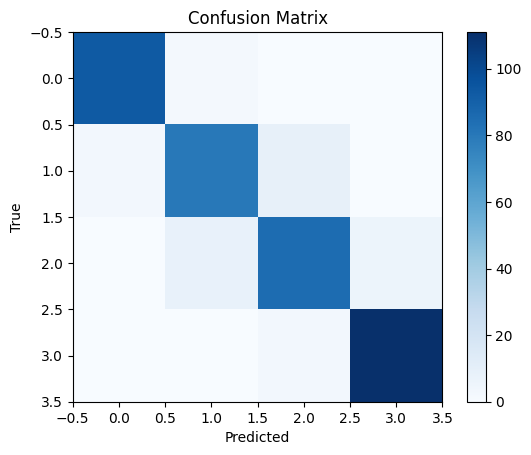

In [19]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, predictions)

plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Not much evidence of overfitting, the accuracy score is suspiciously hight though...

#### Classification report

In [20]:
from sklearn.metrics import classification_report

c_rep = classification_report(y_test, predictions)

c_rep

'              precision    recall  f1-score   support\n\n           0       0.97      0.98      0.97        95\n           1       0.89      0.87      0.88        92\n           2       0.88      0.86      0.87        99\n           3       0.95      0.97      0.96       114\n\n    accuracy                           0.92       400\n   macro avg       0.92      0.92      0.92       400\nweighted avg       0.92      0.92      0.92       400\n'

## Support Vector Machine (SVM)

In [21]:
from sklearn.svm import SVC

svm = SVC(random_state=0)
svm.fit(X_train, y_train)
preds = svm.predict(X_test)

In [22]:
acc = accuracy_score(y_test, preds)

acc

0.955

In [23]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, preds)

mae

0.045

Test with the provided test set